In [1]:
import straph as sg
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In this section we will see how to read different formats of temporal graphs in order to exploit them with ``Straph``.

# Readers and Writers

# 1. Readers

First, we show how to load different formats of '.csv' as most of temporal graphs are stored as triplets $(t,u,v)$, denoting an interactions between nodes $u$ and $v$ at instant $t$, or quadruplets $(b,e,u,v)$ or $(t,\delta,u,v)$, where $b$ or $t$ are the beginning of an interaction, where $e$ is the ending, and where $\delta$ is the duration of the interaction.

## 1.1 '.csv' format

We must specify what we call the ``entry_format``, i.e whether the format is $(t,u,v)$, $(b,e,u,v)$ or $(t,\delta,u,v)$ and which column of the .csv contains which value.
For example if the first column contains the date of the interaction between the entity of the second column and the entity of the third colum: 

In [3]:
entry_format = {'t_pos': 0,'u_pos':1,'v_pos':2}

If the first column contains the first node, the second column the second node, the third column the beginnning of the interaction and the fourth the ending of the interaction:

In [4]:
entry_format = {'u_pos':0,'v_pos':1,'b_pos':2,'e_pos':3}

If the raw data contains the duration of the interaction and its beginning instead of its beginning and ending we can specify it:

In [5]:
entry_format = {'u_pos':0,'v_pos':1,'t_pos':2,'link_duration_pos':3}

The parser also takes a configuration input with some optionnal parameters:
- ```delimiter``` (as in csv.reader default is ',')
- ```ignore_header``` (set to 'True' to skip the first line)
- ```nodes_to_label``` (set to 'True' to keep node's labels cf : introduction.ipynb)
- ```time_is_datetime``` (set to 'True' if times log are timestamps)
- ```is_link_stream``` (if 'True' we consider that nodes are always present)
- ```nrows``` (the number of rows to be read)
- ```delta``` (Force links  to begin/end in the window $[t-\delta/2;t+\delta/2]$)

Parsing CSV: 100%|██████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10007.88it/s]


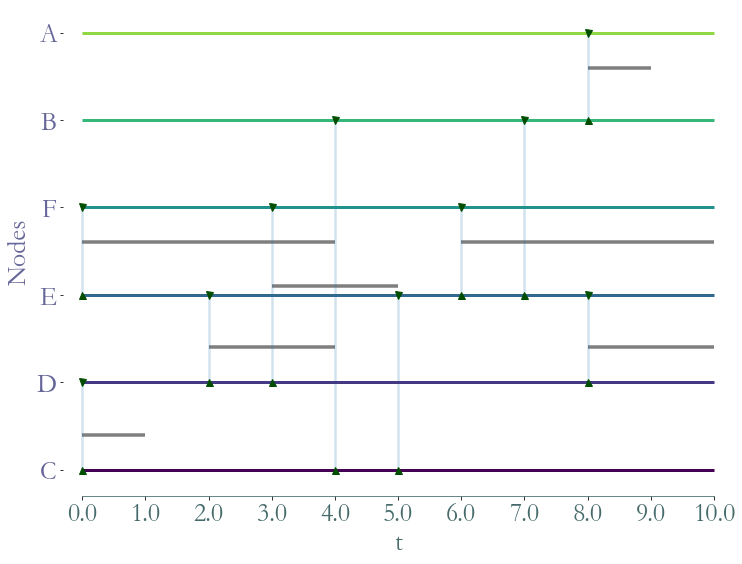

In [6]:
path_csv = "examples/example.csv"
entry_format = {'b_pos': 0, 'e_pos': 1,'u_pos': 2, 'v_pos': 3}
S = sg.parser(input_file=path_csv,
                  input_format='csv',
                  entry_format = entry_format,
                  is_link_stream = True,
                  nodes_to_label = True,
                  delimiter = ';'
                 )
_ = S.plot()


If we want to set the default duration of an interaction: 

Parsing CSV: 100%|███████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 9875.92it/s]


<AxesSubplot:xlabel='t', ylabel='Nodes'>

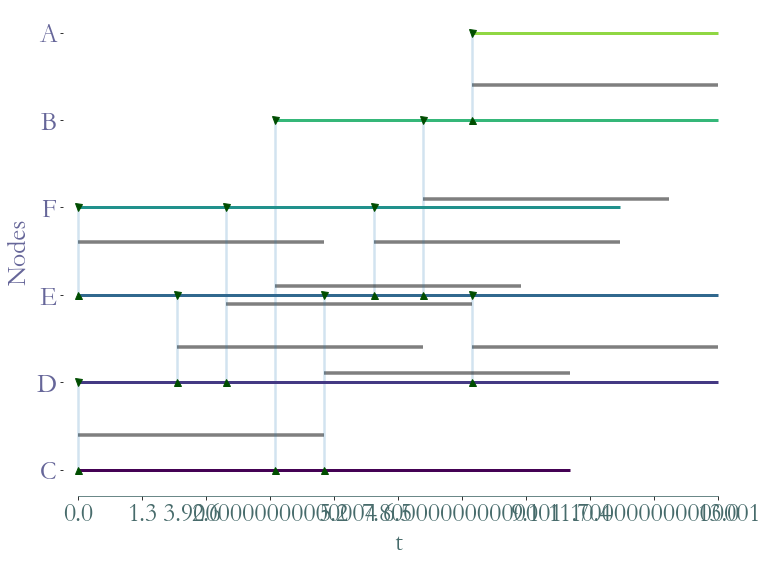

In [8]:
path_csv = "examples/example.csv"
entry_format = {'t_pos': 0 ,'u_pos': 2, 'v_pos': 3}
S = sg.parser(input_file=path_csv,
                  input_format='csv',
                  entry_format = entry_format,
                  link_duration = 5,
                  nodes_to_label = True,
                  delimiter = ';')
S.plot()

# 2. Writers

## 2.1 '.sg' format

In [ ]:
output_file = ""
S.write_to_sg(out_put_file)